# 6. Deep Learning Basics: Understanding Neural Networks with MNIST

## Introduction

Welcome to this interactive introduction to **Deep Learning**! In this notebook, we’ll take our first steps into the world of neural networks, unraveling how they work and why they’re so powerful for solving real-world problems.

Think of this as learning to use a powerful new tool—a tool that mimics how our own brains recognize patterns. By the end of this notebook, you’ll know how to build and train a simple neural network to classify handwritten digits.

### Objectives

By the end of this notebook, you will:
1. Understand **what neural networks are** and how they learn.
2. Build a simple neural network step-by-step using the **MNIST dataset** of handwritten digits.
3. Train the network and visualize its learning process over time.
4. Evaluate the model's accuracy and **interpret predictions with confidence**.

### Key Features
- Learn **what makes deep learning different** and why it’s effective.
- Build a neural network with just **4 simple layers**.
- Visualize model training and predictions to understand **what’s happening under the hood**.

## 1. What is Deep Learning?

Deep Learning is a subset of **Machine Learning** that uses multi-layered neural networks to learn patterns from data. Unlike traditional algorithms, deep learning models:
- Automatically extract features from raw data (no manual engineering needed).
- Learn hierarchical representations, starting with simple patterns (e.g., edges) and building up to complex concepts (e.g., a digit or a face).

### A Real Example: Handwriting Recognition

Imagine recognizing handwritten digits (like on a check). Traditional methods require programming rules to detect loops or lines. Deep learning instead:
1. Takes raw images as input.
2. Learns simple patterns like edges in the first layer.
3. Builds complex concepts like curves and shapes in deeper layers.
4. Outputs the predicted digit (e.g., "This is a 7").

This automatic learning makes deep learning both powerful and flexible.

### Why It Excels:

- **Learns Patterns**: From simple edges to full objects or words.
- **Handles Complexity**: Works on noisy or unstructured data.
- **Versatile**: Excels in images, audio, text, and time-series data.

## 2. What are Neural Networks?

Neural Networks are the foundation of deep learning. Inspired by the human brain, they consist of:
- **Neurons**: The building blocks that process information. Each neuron takes inputs, applies a mathematical operation (e.g., weighted sum), and produces an output.
- **Layers**:
  - **Input Layer**: Receives the raw data (e.g., an image's pixels).
  - **Hidden Layers**: Perform calculations to extract features and patterns.
  - **Output Layer**: Produces predictions (e.g., the digit "3").

The key idea is **learning through weights**. Neurons adjust their weights during training to improve predictions.

### A Real Example: Predicting Weather
Imagine predicting tomorrow's temperature based on historical data:
1. **Input Layer**: Receives raw inputs like past temperatures, humidity, and wind speed.
2. **Hidden Layers**: Combine these inputs, identifying patterns (e.g., “high humidity with falling temperatures often means rain”).
3. **Output Layer**: Produces a single prediction (e.g., "20°C").

### How It Works:
- **Neurons**: Each neuron applies a mathematical operation (e.g., weighted sum) to its inputs and passes the result to the next layer.
- **Learning Through Weights**: The network adjusts weights between neurons during training to minimize prediction errors and improve accuracy.

### Why Neural Networks Are Powerful:
- **Adaptability**: Handle diverse data types (numbers, text, images).
- **Hierarchical Learning**: Extracts simple patterns in early layers and builds complexity in deeper layers.
- **Scalability**: Works well even with large datasets, finding patterns beyond human intuition.

## 3. Installing Required Libraries

Before we begin, ensure you have the necessary libraries installed. Run the following command:

In [8]:
%pip install tensorflow matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


## 4. Loading and Visualizing the MNIST Dataset

The **MNIST dataset** contains 70,000 grayscale images of handwritten digits (0-9). Each image is 28×28 pixels.

### Steps:
1. Load the dataset using TensorFlow.
2. Normalize the data (scale pixel values to [0, 1] for faster training).
3. Visualize a sample image to understand the data.

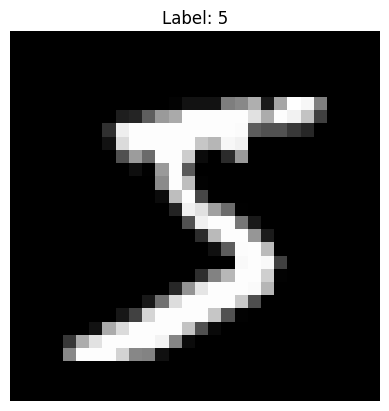

In [9]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data (scale pixel values to 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Visualize a sample image
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

## 5. Building a Simple Neural Network

Let’s create a neural network to classify digits:
1. **Flatten Layer**: Converts each 28×28 image into a single row of 784 values.
2. **Dense Layer (Hidden)**: 128 neurons with **ReLU activation** to detect patterns.
3. **Dense Layer (Output)**: 10 neurons with **Softmax activation** to output probabilities for each digit (0-9).

In [10]:
# Define the model
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image to a vector
        Dense(128, activation="relu"),  # Hidden layer with 128 neurons
        Dense(10, activation="softmax"),  # Output layer with 10 neurons (one per digit)
    ]
)

# Compile the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Training the Neural Network

### Steps:
1. Use **Training Data**: Teach the model using labeled examples (images with known digits).
2. Minimize **Loss**: Adjust weights to reduce the error in predictions.
3. Monitor **Accuracy**: Check how often the model predicts correctly.

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8634 - loss: 0.4751 - val_accuracy: 0.9564 - val_loss: 0.1593
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9607 - loss: 0.1382 - val_accuracy: 0.9677 - val_loss: 0.1123
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9749 - loss: 0.0847 - val_accuracy: 0.9708 - val_loss: 0.1026
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9806 - loss: 0.0644 - val_accuracy: 0.9739 - val_loss: 0.0885
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9866 - loss: 0.0442 - val_accuracy: 0.9699 - val_loss: 0.1016
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9759 - val_loss: 0.0904
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9919 - loss: 0.0284 - val_accuracy: 0.9750 - val_loss: 0.0870
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9952 - loss: 0.0178 - 

## 7. Visualizing Training Performance

We’ll plot:
- **Accuracy**: Percentage of correct predictions during training and validation.
  - **Training Accuracy**: Shows how well the model is learning from the data it has seen during training.
  - **Validation Accuracy**: Evaluates how well the model performs on unseen validation data. This helps ensure the model generalizes well to new data.

- **Loss**: The error in the model's predictions, which the model aims to minimize.
  - **Training Loss**: Represents how well the model is fitting the training data. A decreasing loss indicates the model is improving during training.
  - **Validation Loss**: Reflects how well the model performs on unseen data. If validation loss starts increasing while training loss decreases, the model might be overfitting.

### Why These Metrics Matter:
- **Accuracy**: Indicates the model's success in making correct predictions. Higher accuracy reflects better performance.
- **Loss**: Tracks the model's optimization progress. A lower loss value generally implies better model performance.

The goal is to maintain a balance where both training and validation accuracy are high, and their corresponding loss values are low. This ensures the model performs well on both the data it has seen and new, unseen data.

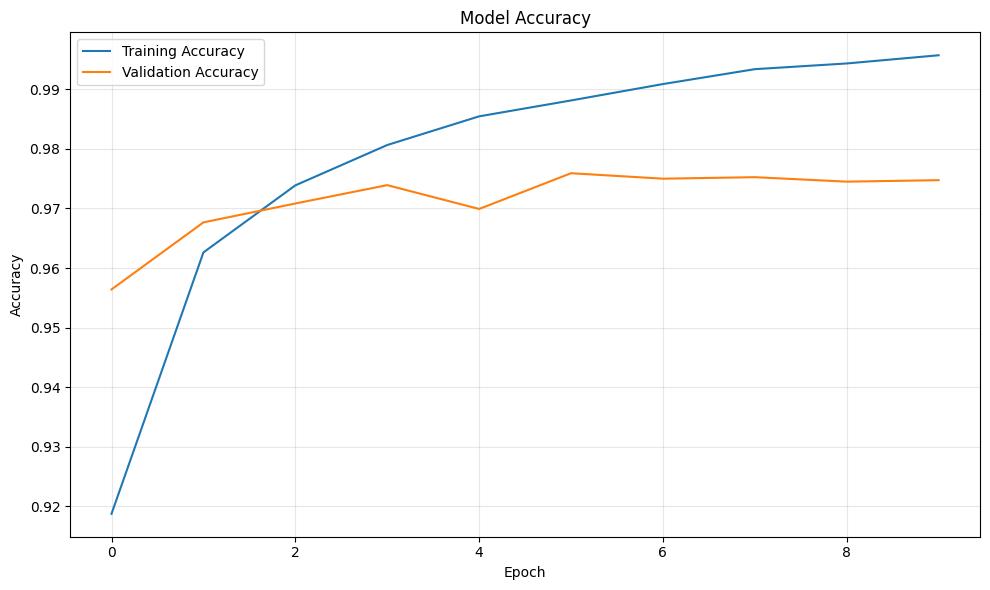

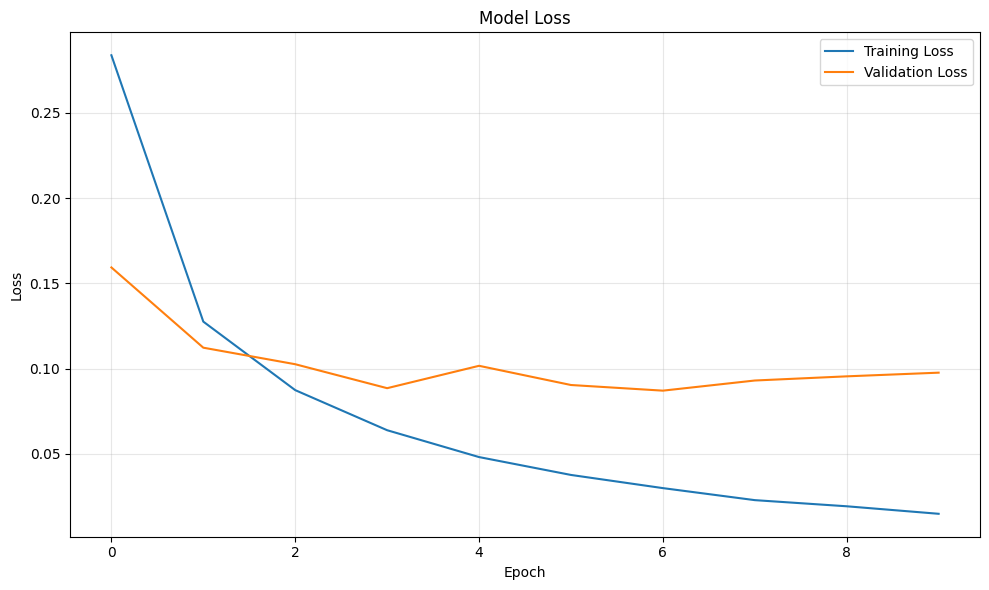

In [12]:
# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Evaluating the Model

To test the model, we’ll use **unseen data** (the test set) and measure its accuracy.

In [13]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.98


## 9. Making Predictions

Finally, let’s visualize some predictions and compare them to the true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


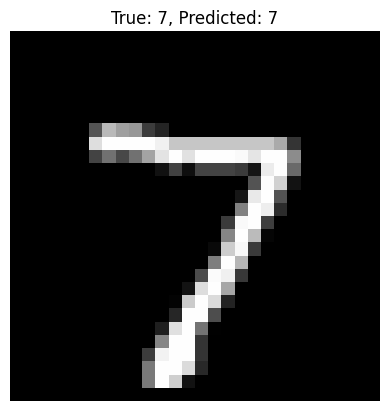

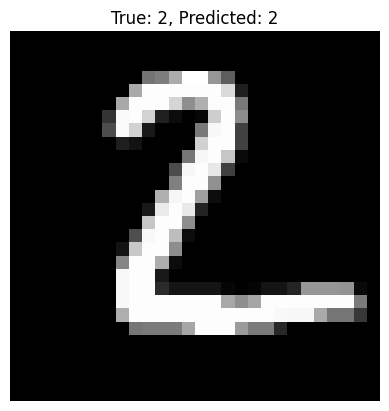

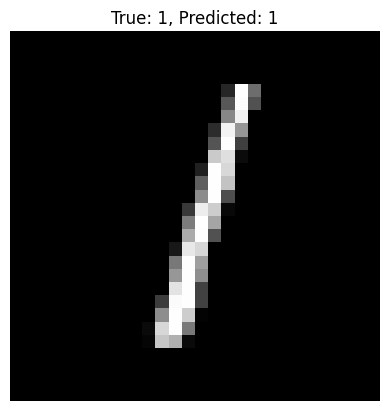

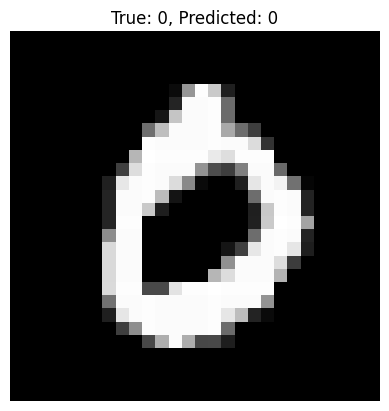

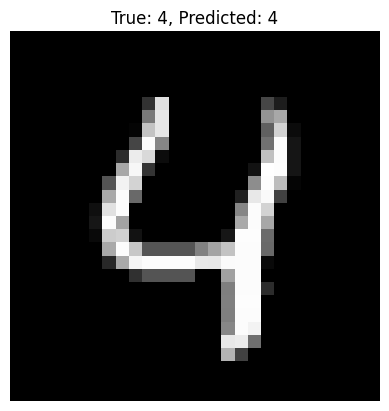

In [14]:
# Make predictions
predictions = model.predict(X_test)

# Show some predictions alongside true labels
for i in range(5):
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"True: {y_test[i]}, Predicted: {tf.argmax(predictions[i]).numpy()}")
    plt.axis("off")
    plt.show()

## 10. Conclusion

1. **Deep Learning** is a powerful tool for recognizing patterns in complex data, like handwritten digits.
2. By stacking layers, neural networks can detect features hierarchically, from simple edges to complete digits.
3. The MNIST dataset is a great starting point, but this same approach can scale to real-world problems like **image recognition** and **natural language processing**.

**Next Steps**:
- Explore **Convolutional Neural Networks (CNNs)** for image classification.
- Experiment with other datasets or tasks, like sentiment analysis or object detection.